In [ ]:
!pip install easyocr
!pip install imutils

In [1]:
import pandas as pd

In [2]:
n=[]
t=[]
dict={'number':n,'time':t}
h=pd.DataFrame(dict)

In [3]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imutils
import easyocr

In [ ]:
cam_port = 0
cam = cv2.VideoCapture(0)
# reading the input using the camera
result, image = cam.read()
# showing result
if result:
    # saving image 
    cv2.imwrite("TEST.jpeg", image)
    #turning off camera after capturing
    cam.release()
    #ploting captured image
    plt.imshow(mpimg.imread('TEST.jpeg'))  
# If any problem in capturing image from camera
else:
    print("No image detected. Please! try again")

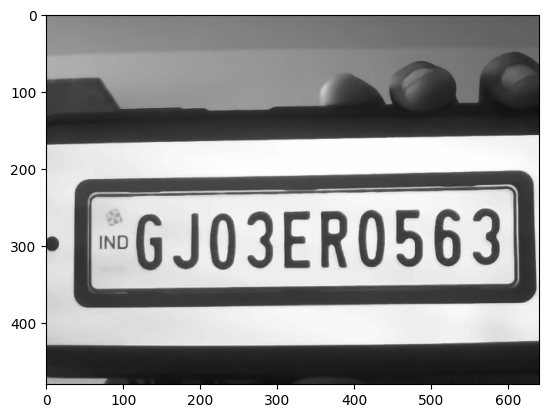

In [4]:
img = cv2.imread('TEST.jpeg')
test=cv2.fastNlMeansDenoisingColored(img,None,3,3,7,21)
#plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

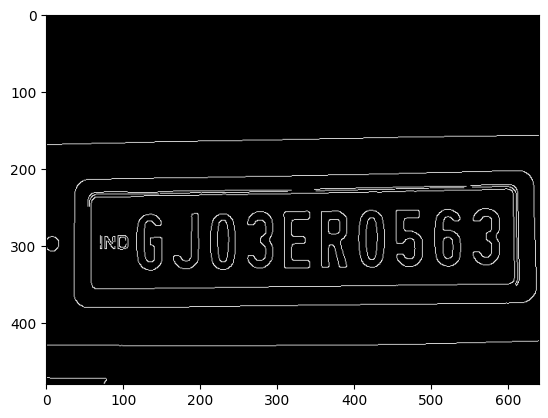

In [5]:
bfilter = cv2.bilateralFilter(gray, 221, 100, 100) #Noise reduction
edged = cv2.Canny(bfilter, 200, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [8]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [9]:
location

array([[[606, 232]],

       [[ 63, 237]],

       [[ 58, 348]],

       [[600, 350]]], dtype=int32)

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

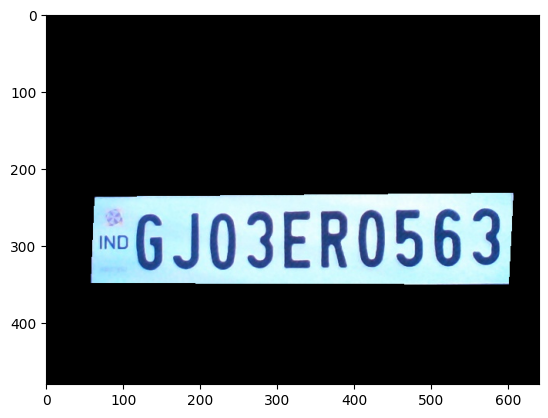

In [11]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [12]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

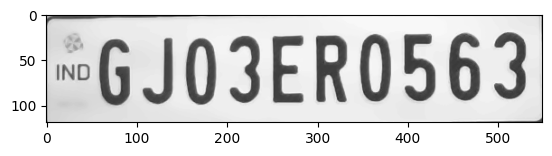

In [13]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [14]:
reader = easyocr.Reader(['en'])
result = reader.readtext(edged)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[66, 282], [112, 282], [112, 312], [66, 312]], 'InD', 0.7210732283146467),
 ([[102, 235], [601, 235], [601, 346], [102, 346]],
  'gJOJERO563',
  0.26786021795016784)]

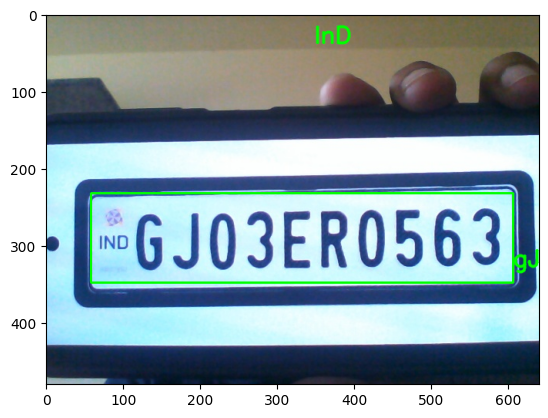

In [16]:
text = result[0][-2]
text1 = result[1][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text1, org=(approx[0][0][0], approx[1][0][1]+90), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.putText(img, text=text, org=(approx[2][0][1], approx[1][0][1]-200), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [17]:
number=text1
print(number)
        

gJOJERO563


In [ ]:
import datetime

In [ ]:
h=datetime.datetime.now()
time=h.strftime("%H:%M:%S")
print(time)

In [ ]:
d=pd.read_csv('test2.csv')
d

In [ ]:
n.append(number)
t.append(time)

In [ ]:
h=pd.DataFrame(dict)
h.to_csv('test2.csv',mode='a',header=None,index=False)

In [19]:
d=pd.read_csv('test2.csv')
d

,number,time
0,CGO4HF2250,22:45:13
1,HRZGDK8337|,22:47:06
2,HRZGDK8337|,02:53:56


In [20]:
n.clear()
t.clear()

In [21]:
#creating list for number column in csv d
l1=d['number'].tolist()
l1

['CGO4HF2250', 'HRZGDK8337|', 'HRZGDK8337|']

In [22]:
#creating list for time column in csv d
l2=d['time'].tolist()
l2

['22:45:13', '22:47:06', '02:53:56']